In [19]:
#libraries for plotting
#remember to import %% first

In [15]:
%%capture
! pip install ipywidgets
#import libraries
import pandas as pd
import numpy as np

#import clean data
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
df = pd.read_csv(path)

In [16]:
#save to cvs file
df.to_csv('module_5_auto.cvs')

In [17]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [20]:
from ipywidgets import interact, interactive,fixed,interact_manual

In [21]:
#function for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [22]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h1 id="ref1">Part 1: Training and Testing</h1>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y</b>:</p>

In [23]:
y_data=df['price']

In [25]:
x_data=df.drop('price',axis=1)

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [27]:
#split up dataset 40% used for testing (test_size=0.4)
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)


print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [28]:
#import linearRegression from module linear_model
from sklearn.linear_model import LinearRegression


In [29]:
lr=LinearRegression()

In [30]:
lr

LinearRegression()

In [31]:
lr.fit(x_train[['horsepower']],y_train)

LinearRegression()

In [32]:
#calculate r^2 on the test data
lr.score(x_test[['horsepower']],y_test)

0.3635875575078824

In [33]:
lr.score(x_train[['horsepower']],y_train)

0.6619724197515103

The R^2 of test data is smaller 

In [41]:
#split up dataset 90% used for training aka 10% for test (test_size=0.1)
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(x_data,y_data,test_size=0.1,random_state=0)
lr.fit(x_train2[['horsepower']],y_train2)
#calculate the R^2 of testing and training data
lr.score(x_test2[['horsepower']],y_test2)


0.7340722810055448

 Sometimes you do not have sufficient testing data; as a result, you may want to perform Cross-validation. Let's  go over several methods that you can use for  Cross-validation. 
 <h2>Cross-validation Score</h2>

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
#input the object,feature in this case is 'horsepower', the target data(y_data~price) 
#cv is parameter the num of folds here is 4
Rcross=cross_val_score(lr,x_data[['horsepower']],y_data,cv=4)

In [45]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

The default scoring is R^2, each element in the array has average R^2 value in the fold <br> 
we can calculate the average and std 


In [46]:
print("The mean of the folds are",Rcross.mean(),"and the standard deviation is ", Rcross.std())

The mean of the folds are 0.5220099150421194 and the standard deviation is  0.2911839444756025


In [47]:
#use negative MSE
-1*cross_val_score(lr,x_data[['horsepower']],y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.26505169, 12539630.34014931,
       17561927.72247589])

In [48]:
#calculate R^2 using 2 folds and find the mean for the second fold
Rcross2=cross_val_score(lr,x_data[['horsepower']],y_data,cv=2)
Rcross2

array([0.59015621, 0.44319613])

In [49]:
print("The mean of the folds are",Rcross.mean())

The mean of the folds are 0.5220099150421194


In [50]:
#using cross_val_predict to predict the output
from sklearn.model_selection import cross_val_predict

In [51]:
yhat=cross_val_predict(lr,x_data[['horsepower']],y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h1 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h1>

<p>It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world.  One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>


In [52]:
lr

LinearRegression()

In [53]:
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_train)

LinearRegression()

In [54]:
#prediction using train data
yhat_train=lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [56]:
#prediction using test data
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
import seaborn as sns

Let's perform some model evaluation using our training and test data seperately

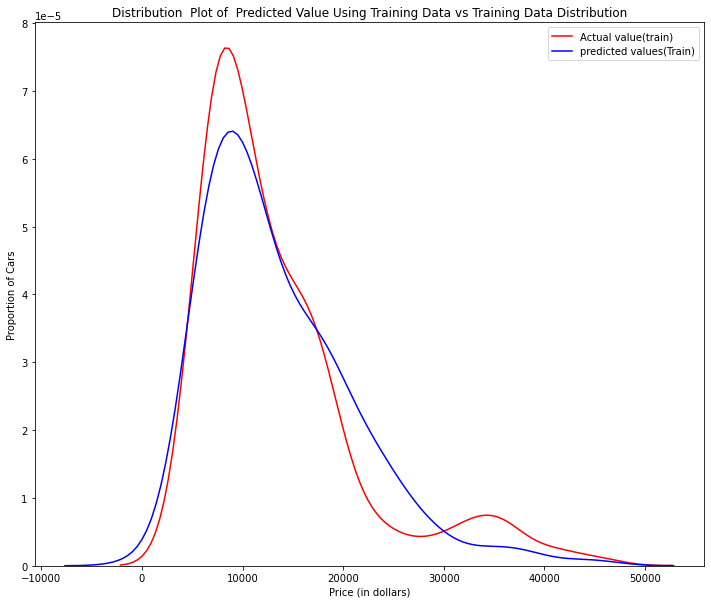

In [60]:
Title='Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train,yhat_train,"Actual value(train)","predicted values(Train)",Title)

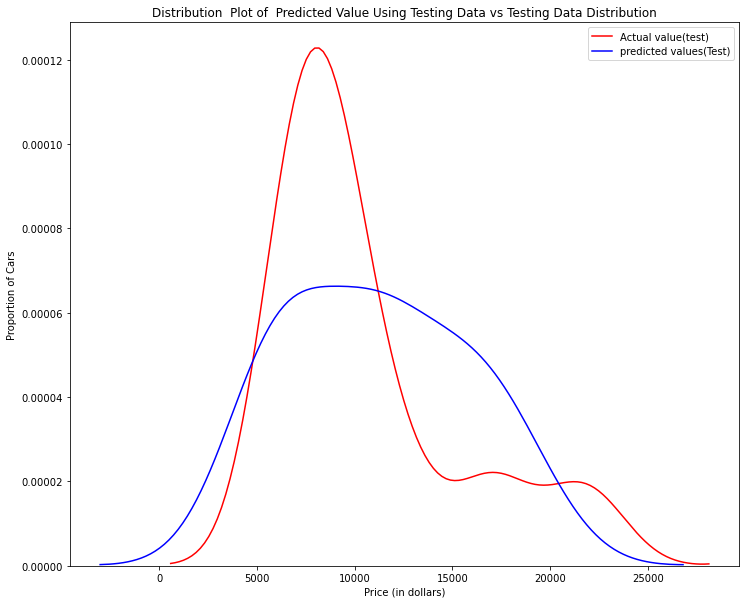

In [61]:
Title='Distribution  Plot of  Predicted Value Using Testing Data vs Testing Data Distribution'
DistributionPlot(y_test,yhat_test,"Actual value(test)","predicted values(Test)",Title)

<p>Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


In [63]:
from sklearn.preprocessing import  PolynomialFeatures

<h3>Overfiting</h3>
<p>Overfitting occurs when the model fits the noise not the underlying process.Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>

<p>Let's use 55 percent of the data for training and the rest for testing:</p>

In [66]:
x_train ,x_test,y_train,y_test=train_test_split(x_data,y_data,test_size=0.45,random_state=0)

In [70]:
pf=PolynomialFeatures(degree=5)
x_train_pf=pf.fit_transform(x_train[['horsepower']])
x_test_pf=pf.fit_transform(x_test[['horsepower']])
pf

PolynomialFeatures(degree=5)

In [71]:
poly=LinearRegression()

In [72]:
poly.fit(x_train_pf,y_train)

LinearRegression()

In [73]:
yhat=poly.predict(x_test_pf)
yhat[0:5]

array([ 6728.73877623,  7308.06173582, 12213.81078747, 18893.1290908 ,
       19995.81407813])

In [74]:
#print the actual values and predicted values and make a comparision
print("predicted value: ",yhat[0:4])
print("true values :",y_test[0:4].values)

predicted value:  [ 6728.73877623  7308.06173582 12213.81078747 18893.1290908 ]
true values : [ 6295. 10698. 13860. 13499.]


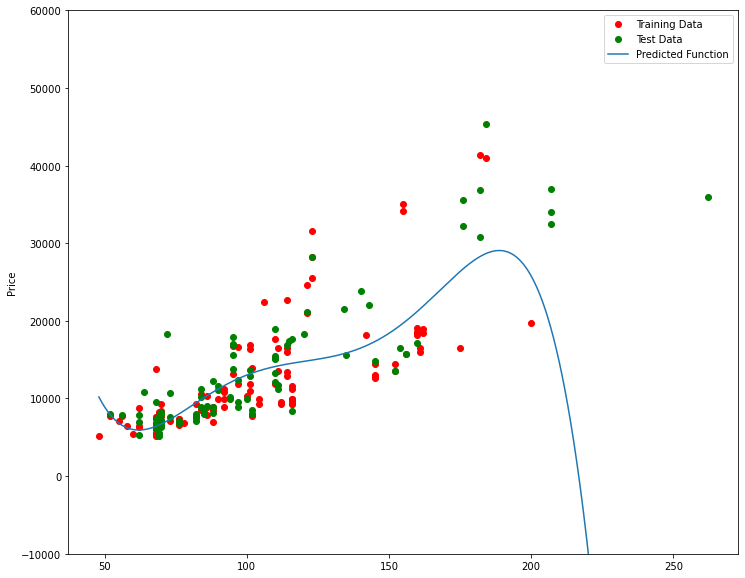

In [76]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pf)

In [78]:
#R^2 of training data
poly.score(x_train_pf,y_train)

0.5567716902028981

In [79]:
#R^2 of testing 
poly.score(x_test_pf,y_test)

-29.871621329672777

The lower R^2 is the worse model and negative is a sign for overfitting

Text(3, 0.75, 'Maximum R^2 ')

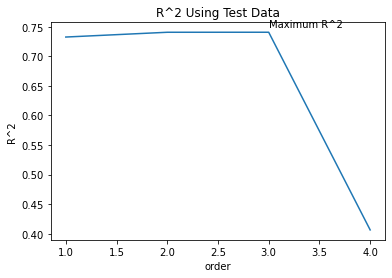

In [80]:
#Let's see how the R^2 changes on the
#test data for different order polynomials
#and plot the results:

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [81]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

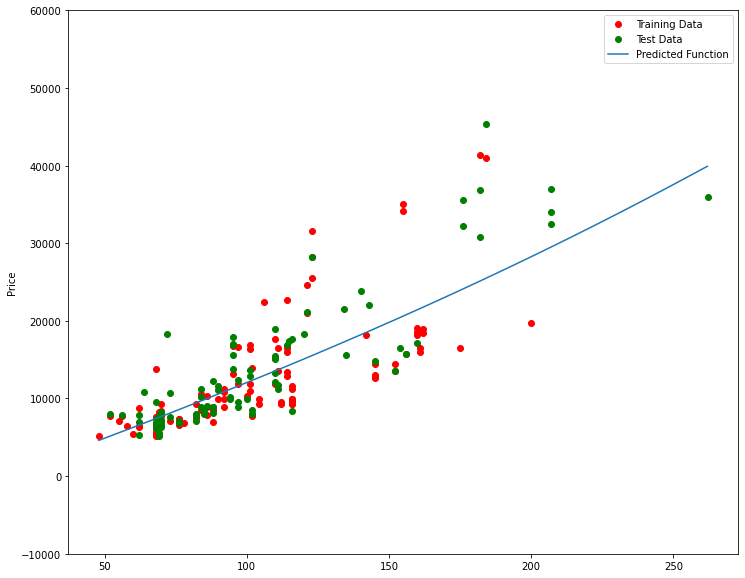

<function __main__.f(order, test_data)>

In [82]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

In [100]:
#Create a polynomial features and object pf1 of degree 2
pf1=PolynomialFeatures(degree=2)

In [101]:
#Transform the training and testing samples for the features
#'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'.
#Hint: use the method "fit_transform" ?

x_train_pf1=pf1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pf1=pf1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


In [102]:
x_train_pf1.shape

(110, 15)

In [103]:
x_test_pf1.shape

(91, 15)

In [104]:
#create a linear regression model and train the object using the method "fit"
poly1=LinearRegression()
poly1

LinearRegression()

In [109]:
poly1.fit(x_train_pf1,y_train)

LinearRegression()

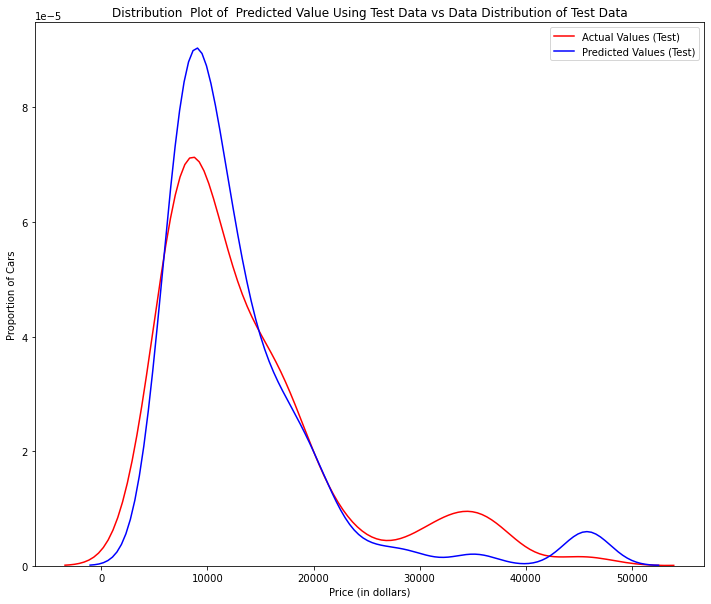

In [110]:
#predict an output on the polynomial features and 
#using function DistributionPlot to 
#display the distribution of the predicted output vs test data
yhat_test1=poly1.predict(x_test_pf1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [ ]:
#the predicted value is higher than the actual in $10,000 range and 
#is smaller in $30,000 to $40,000 range

<h2 id="ref3">Part 3: Ridge regression</h2> 

In [111]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [112]:
from sklearn.linear_model import Ridge

In [114]:
#create a ridge regression object, setting regulation parameter to 0.1
RigeModel=Ridge(alpha=0.1)

In [115]:
#fit
RigeModel.fit(x_train_pf,y_train)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.56446e-25): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1)

In [116]:
yhat = RigeModel.predict(x_test_pf)

In [117]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6811.10589139  7378.57821558 12140.80857052 18990.71893393]
test set : [ 6295. 10698. 13860. 13499.]


we can compare five predicted samples to our test set like above

In [118]:
#We select the value of Alpha that minimizes the test error, 
#for example, we can use a for loop.

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
for alpha in Alpha:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

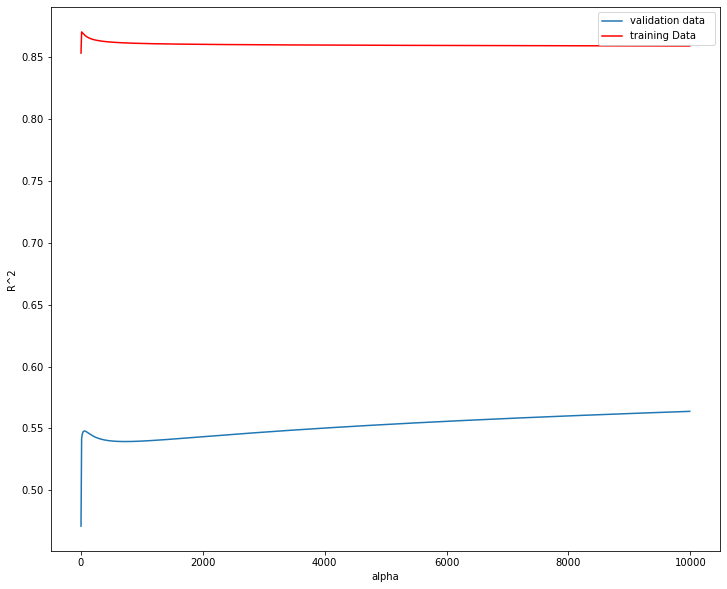

In [119]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 6**:The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha. 

Here the model is built and tested on the same data. So the training and test data are the same.

The red line in figure 6 represents the R^2 of the training data.  
As Alpha increases the R^2 decreases.  
Therefore as Alpha increases the model performs worse on the training data.  

The blue line represents the R^2 on the validation data.  
As the value for Alpha increases the R^2 increases and converges at a point  


In [121]:
#Perform Ridge regression and calculate the R^2 using the polynomial features,
# use the training data to train the model and test data to test the model.
# The parameter alpha should be set to 10.

RigeModel1=Ridge(alpha=10)
RigeModel1.fit(x_train_pf,y_train)

#calculate R^2 using polynomial feature
RigeModel1.score(x_test_pf, y_test)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.56446e-23): result may not be accurate.
  overwrite_a=True).T


0.573529154505212

<h2 id="ref4">Part 4: Grid Search</h2>


The term Alfa is a hyperparameter, sklearn has the class  <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.


In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
#create a dictionary of parameter values
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [124]:
#create a ridge region object
RR=Ridge()
RR


Ridge()

In [125]:
#create a ridge grid search object
Grid1=GridSearchCV(RR,parameters1,cv=4)

In [126]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [127]:
#obtain the estimator with the best parameters and assign to bestRR
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [128]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

In [129]:
#Perform a grid search for the alpha parameter and the normalization parameter, 
#then find the best values of the parameters 
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000],'normalize':[True,False]}]
parameters2

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000],
  'normalize': [True, False]}]

In [132]:
Grid2=GridSearchCV(RR,parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
Grid2.best_estimator_


Ridge(alpha=0.1, normalize=True)